In [10]:
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline 


In [11]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
# Data Visualization & Exploration

In [12]:
left = df[df.left==1]
left.shape


(3571, 10)

In [13]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [ ]:
# Average Number for all columns
df.groupby('left').mean()

In [47]:
##Impact of salary on the retention of employees

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [ ]:
#Department wise employee retention rate 

<Axes: xlabel='Department'>

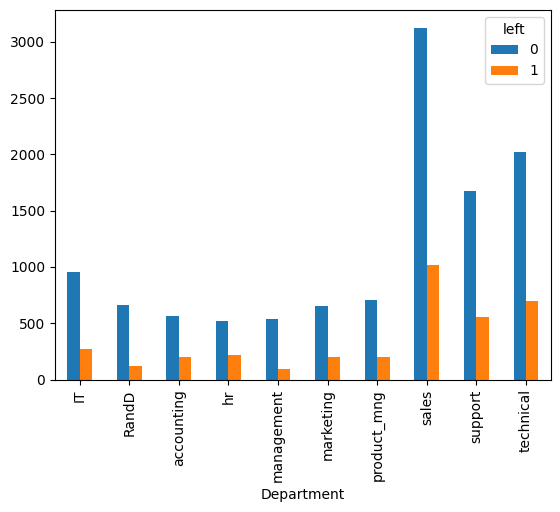

In [16]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [17]:
# We will create a sub-dataframe with the following independent variables 
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [18]:
salary_dummies = pd.get_dummies(subdf.salary, prefix = "salary")

In [19]:
df_with_dummies = pd.concat([subdf, salary_dummies], axis='columns')

In [20]:
df_with_dummies.drop('salary', axis='columns', inplace= True)

In [22]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [25]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [26]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3)

In [38]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [40]:
lr.fit(X_train, y_train)

C:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
#Accuracy of the model

In [ ]:
model.score(X_test,y_test)